# **Name - PRABHAKAR KUMAR**
# **Roll - IRM2017008**
# **Face Recognition using PCA**
# **K = 30**

In [1]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import os

# Please drive the Google Drive and save the Image Dataset as was given to be used, for the following code to work.

In [7]:
directory = "/content/drive/MyDrive/dataset"
train_photos = sorted(os.listdir(directory))

In [8]:
print(train_photos)

['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


In [11]:
# 40 sets of 10 images each
dataset_path = '/content/drive/MyDrive/dataset'
dataset_dir  = os.listdir(dataset_path)

width  = 92
height = 112

# **Preparing Training Data and Testing Data according to 60:40 split rule as per given in the instructions.**

Train Images:


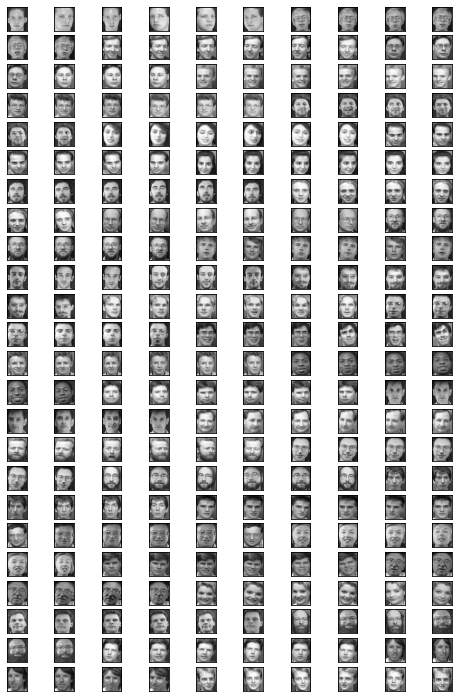

In [13]:
print('Train Images:')
training_tensor   = np.ndarray(shape=(240, height*width), dtype=np.float64)
iter = 0

for i in range(40):
    for j in range(6):
        img = plt.imread(dataset_path + '/s'+str(i+1) + '/' + str(j+1) + '.pgm')
        training_tensor[iter,:] = np.array(img, dtype='float64').flatten()
        plt.subplot(24,10,iter+1)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
        iter += 1
plt.show()

Test Images:


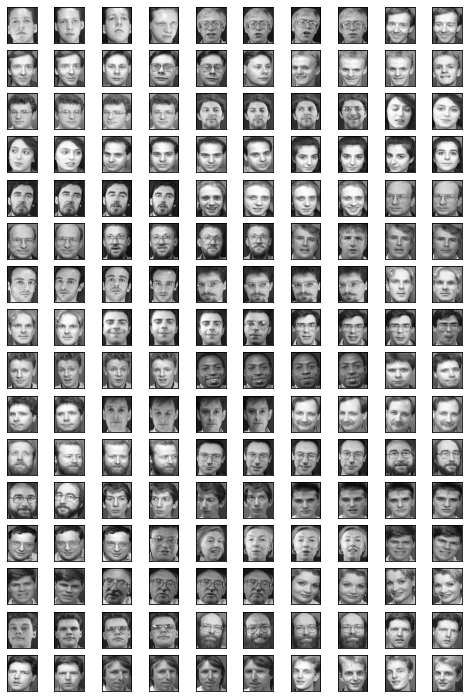

In [14]:
print('Test Images:')
testing_tensor = np.ndarray(shape=(160, height*width), dtype=np.float64)
iter = 0

for i in range(40):
    for j in range(4):
        index = 7+j
        img = plt.imread(dataset_path + '/s'+str(i+1) + '/' + str(index) + '.pgm')
        testing_tensor[iter,:] = np.array(img, dtype='float64').flatten()
        plt.subplot(16,10,iter+1)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
        iter += 1
plt.show()

# **Calculating Mean**

In [15]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_tensor))).flatten()

# **Subtracting Mean from Images**

In [16]:
normalised_training_tensor = np.ndarray(shape=(len(training_tensor), height*width))

for i in range(len(training_tensor)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

# **Generating Covariance Matrix**

In [17]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,60.0)
print('Covariance matrix of X:')
print(cov_matrix)

Covariance matrix of X:
[[19.69722674  1.58695456 10.51336402 ... -4.46493749 -1.24359515
  -1.44129757]
 [ 1.58695456 21.50119618  5.55897516 ...  2.94090644 -4.67094218
   0.43634059]
 [10.51336402  5.55897516 25.25909294 ...  1.28649371 -1.28871339
   1.99838051]
 ...
 [-4.46493749  2.94090644  1.28649371 ... 22.65122479  4.15459404
   7.14487445]
 [-1.24359515 -4.67094218 -1.28871339 ...  4.15459404 12.89174753
   4.06475081]
 [-1.44129757  0.43634059  1.99838051 ...  7.14487445  4.06475081
  19.23054345]]


# **Formulating Eigen-vectors and Eigen-values**

In [18]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvalues of Cov(X):',eigenvalues)
print('Eigenvectors of Cov(X):')
print(eigenvectors)

Eigenvalues of Cov(X): [9.83486986e+02 4.68901708e+02 4.19140055e+02 3.41790853e+02
 2.06862727e+02 1.85133379e+02 1.65273806e+02 1.39100244e+02
 1.18892868e+02 1.01056709e+02 8.54277545e+01 7.65924083e+01
 7.20934655e+01 6.44978532e+01 6.36111491e+01 6.10681131e+01
 5.63135856e+01 5.33677408e+01 4.98597892e+01 4.67479507e+01
 4.20770027e+01 4.00100829e+01 3.87727543e+01 3.61019253e+01
 3.43529947e+01 3.35015815e+01 3.24465933e+01 3.18247381e+01
 2.97655724e+01 2.89439795e+01 2.83583650e+01 2.72570530e+01
 2.62808118e+01 2.55588265e+01 2.50376062e+01 2.41522564e+01
 2.29237475e+01 2.19302404e+01 2.15569679e+01 2.09867685e+01
 4.02213518e-16 2.02166814e+01 1.96747530e+01 1.93918952e+01
 1.87961488e+01 1.82369972e+01 1.75243494e+01 1.66374365e+01
 1.61901122e+01 1.60028265e+01 1.53466247e+01 1.52777409e+01
 1.50753492e+01 1.49736258e+01 1.44010879e+01 1.39187522e+01
 1.35168721e+01 1.33990097e+01 1.29587025e+01 1.26646507e+01
 1.25959418e+01 1.20794242e+01 1.19049646e+01 1.18060242e+01
 

# **Generating feature vectors**

In [19]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

print("Cumulative proportion of variance explained vector:", var_comp_sum)

Cumulative proportion of variance explained vector: [0.1789107  0.2642108  0.34045852 0.40263529 0.44026665 0.47394512
 0.50401085 0.52931523 0.55094358 0.56932728 0.58486784 0.59880112
 0.61191598 0.62364909 0.63522089 0.64633007 0.65657434 0.66628271
 0.67535294 0.68385708 0.6915115  0.69878992 0.70584325 0.71241072
 0.71866004 0.72475447 0.73065698 0.73644636 0.74186116 0.74712649
 0.75228529 0.75724375 0.76202462 0.76667414 0.77122885 0.7756225
 0.77979266 0.7837821  0.78770362 0.79152143 0.79519914 0.79877826
 0.80230593 0.80572523 0.8090428  0.81223074 0.81525733 0.81820255
 0.8211137  0.82390548 0.82668472 0.82942715 0.83215107 0.83477084
 0.83730287 0.83976178 0.84219926 0.84455664 0.84686052 0.84915191
 0.85134933 0.85351502 0.85566271 0.85775413 0.85980116 0.86177472
 0.86371696 0.86563548 0.86754108 0.86941735 0.87125261 0.87303112
 0.87479591 0.8765558  0.87828232 0.87998793 0.88164821 0.88329979
 0.88494243 0.88656497 0.88816212 0.88973521 0.89126712 0.89278336
 0.89427552

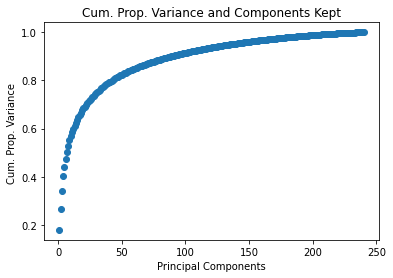

In [20]:
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [21]:
print('Number of eigen vectors:',len(eigvalues_sort))
number_chosen_components = 30
print("k:",number_chosen_components)
reduced_data = np.array(eigvectors_sort[:number_chosen_components]).transpose()

Number of eigen vectors: 240
k: 30


# **Generating Eigen Faces**

In [22]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(30, 10304)

# **Generating Signature of Each Face**

In [23]:
print(normalised_training_tensor.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
w.shape

(240, 10304)
(30, 10304)


(240, 30)

# **Testing and Output**

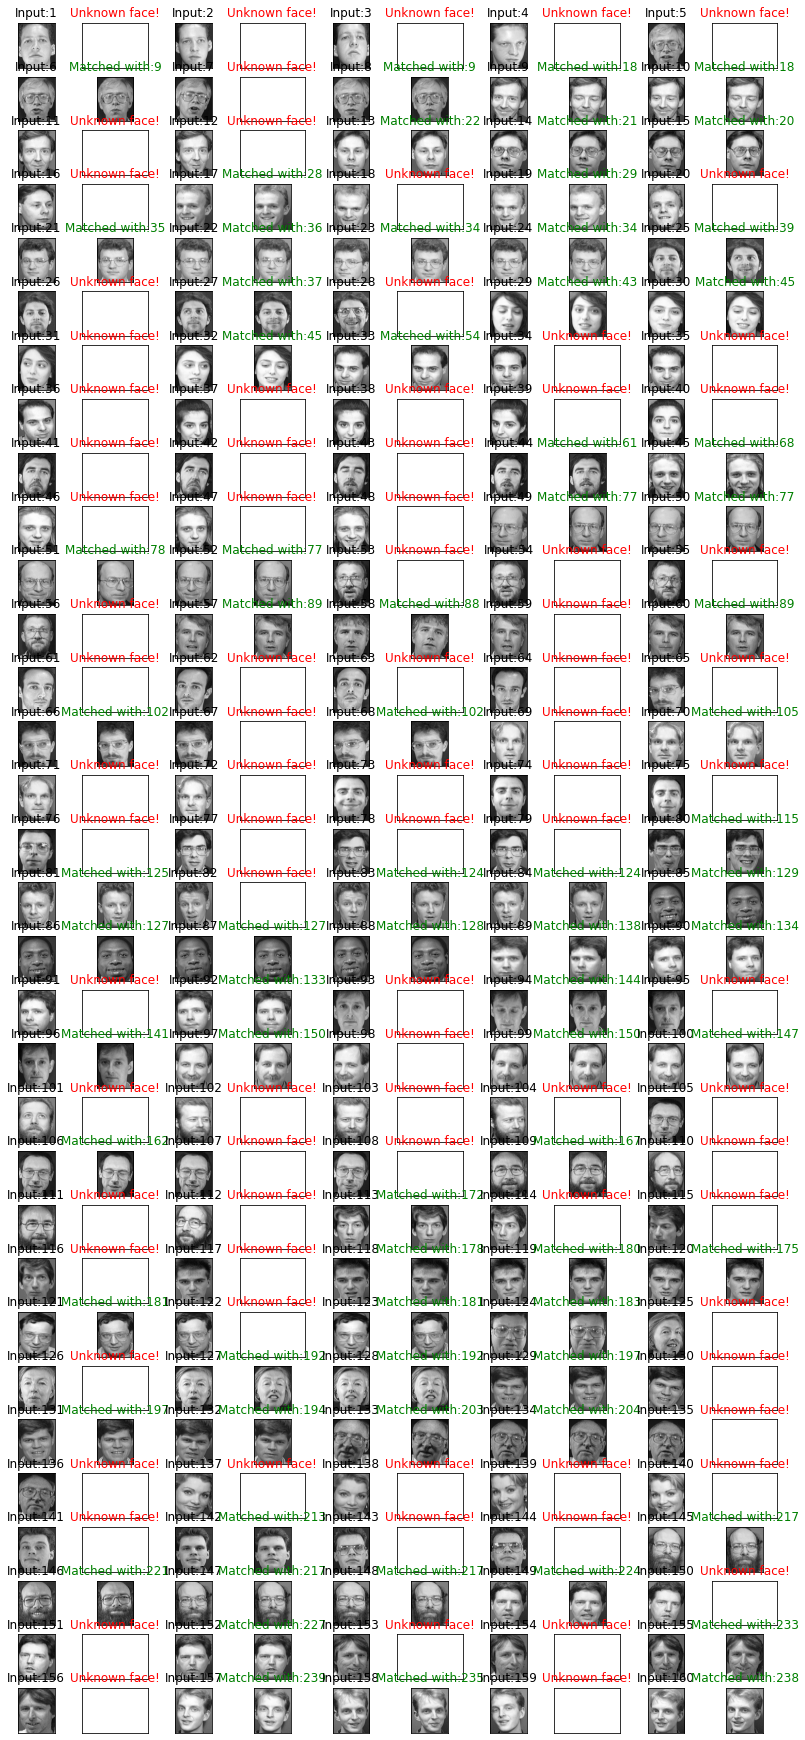

Correct predictions: 74/160 = 46.25%


In [25]:
count=0
num_images=0
correct_pred=0
def recogniser(img_number,proj_data,w):
    global count,highest_min,num_images,correct_pred
    
    num_images += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(32,10,1+count)
    plt.imshow(unknown_face_vector.reshape(height,width), cmap='gray')
    plt.title('Input:'+str(img_number+1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) 
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    plt.subplot(32,10,1+count)
    
    set_number = int(img_number/4)
    t0 = 15000000
       
    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            plt.title('Matched with:'+str(index+1), color='g')
            plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
            correct_pred += 1
        else:
            plt.title('Matched with:'+str(index+1), color='r')
            plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
    else:
        if(img_number>=160):
            plt.title('Unknown face!', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1

fig = plt.figure(figsize=(10, 10))
for i in range(len(testing_tensor)):
    recogniser(i,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

In [26]:
print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

Correct predictions: 74/160 = 46.25%
